In [1]:
import pandas as pd
import sys
import os

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
# read in the data relevant for this figure

# output from the TALON run on single-cell
def get_sc_data():
    fname = '../processing/talon/sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df)
    
    return df

# output from the TALON run on single-ell
def get_sc_ab_data():
    fname = '../processing/talon/sc_talon_abundance_filtered.tsv'
    df = pd.read_csv(fname, sep='\t')    
    return df

# output from the TALON run on bulk
def get_bulk_ab_data():
    fname = '../processing/talon/bulk_talon_abundance_filtered.tsv'
    df = pd.read_csv(fname, sep='\t')
    
    # remove SIRVs and ERCCs
    df = df.loc[~df.annot_gene_id.str.contains('SIRV')]
    df = df.loc[~df.annot_gene_id.str.contains('ERCC')]
    
    return df

# output from the TALON run on bulk and single-cell
def get_sc_bulk_data():
    fname = '../processing/talon/bulk_sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df, bulk=True)
    
    return df

# output from the demultiplexing code
def get_bc_data():
    fname = '../processing/demultiplexing/bcs_pre_correction.tsv'
    pre = pd.read_csv(fname, sep='\t', usecols=[15,16,17,18])
    fname = '../processing/demultiplexing/bcs_post_correction.tsv'
    post = pd.read_csv(fname, sep='\t', usecols=[15,19,20,21])
    
    pre['state'] = 'Pre-correction'
    post['state'] = 'Post-correction'
    
    df = pd.concat([pre, post])
    return df    

### Panel S1B

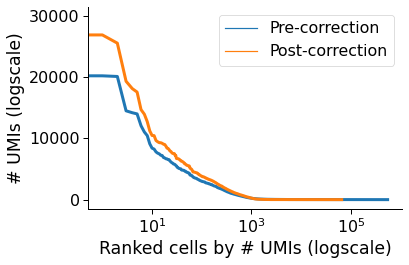

In [3]:
opref = 'figures/pre_post'
df = get_bc_data()
plot_umis_v_barcodes(df, opref)	

### Panel S1C

              state  bin_total  bin_reads  median_umis
37   Pre-correction     619003          0          1.0
20  Post-correction     619003          0          1.0
19  Post-correction        432       1000       1278.0
36   Pre-correction        432       1000       1254.0
35   Pre-correction        214       2000       2226.0


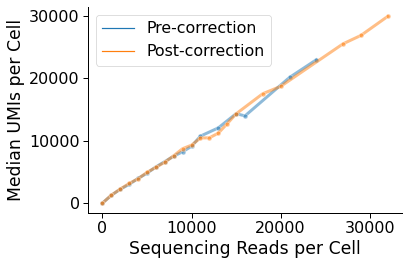

In [4]:
plot_umis_per_cell(df, opref)	

### Panel S1D

  transcript_novelty  counts
0          Antisense   31092
1            Genomic  214230
2                ISM  146232
3         Intergenic   18959
4              Known   22279
5                NIC   15502
6                NNC   17784


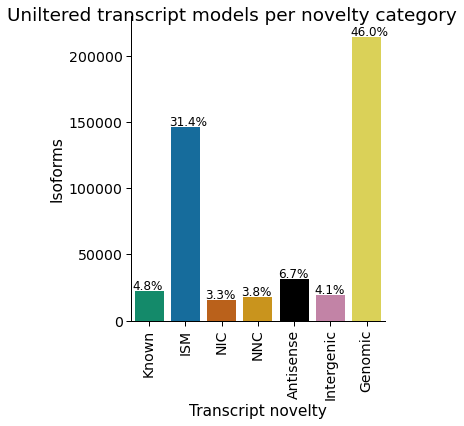

<Figure size 432x288 with 0 Axes>

In [5]:
opref = 'figures/sc_unfiltered'
df = get_sc_data()
c_dict, order = get_talon_nov_colors()
plot_transcript_novelty(df, opref, c_dict, order,
                        title='Uniltered', ylim=230000)

### Panel S1E

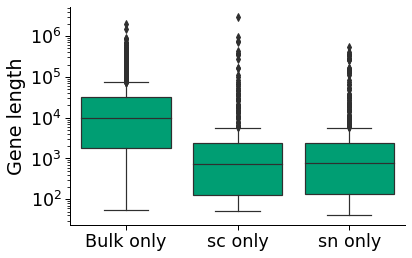

In [6]:
opref = 'figures/bulk_vs_sc'
bulk = get_bulk_ab_data()
sc = get_sc_ab_data()
gtf = '/Users/fairliereese/Documents/programming/mortazavi_lab/ref/gencode.vM21/gencode.vM21.annotation.gtf'
plot_len_boxplot(sc, bulk, gtf, opref, kind='gene')

### Panel S1F

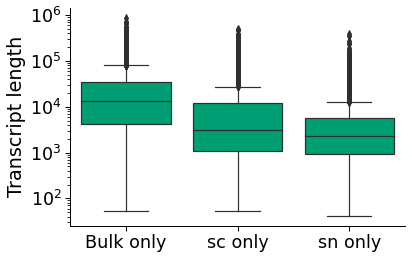

In [7]:
opref = 'figures/bulk_vs_sc'
bulk = get_bulk_ab_data()
sc = get_sc_ab_data()
gtf = '/Users/fairliereese/Documents/programming/mortazavi_lab/ref/gencode.vM21/gencode.vM21.annotation.gtf'
plot_len_boxplot(sc, bulk, gtf, opref, kind='transcript')

### Panel S1G

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


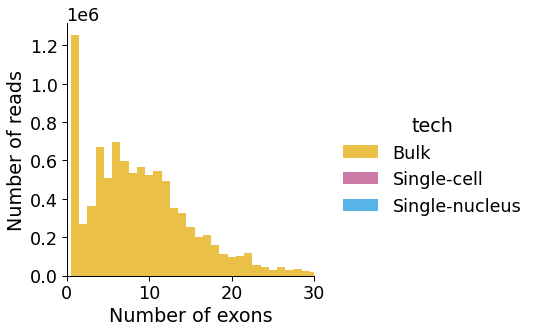

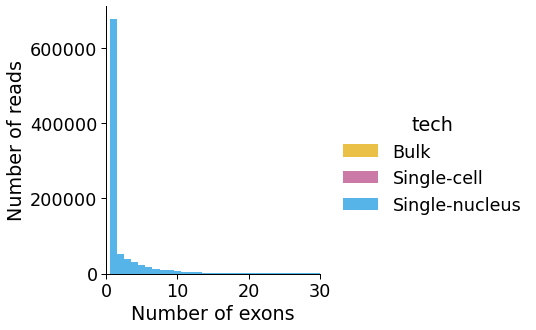

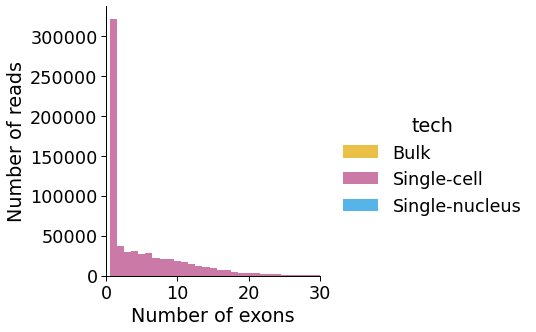

In [8]:
df = get_sc_bulk_data()
plot_exon_hist(df, 'figures/bulk_vs_sc')

### Panel S1H

In [3]:
opref = 'figures/bulk_vs_sc'
bulk = get_bulk_ab_data()
sc = get_sc_ab_data()
gtf = '/Users/fairliereese/Documents/programming/mortazavi_lab/ref/gencode.vM21/gencode.vM21.annotation.gtf'

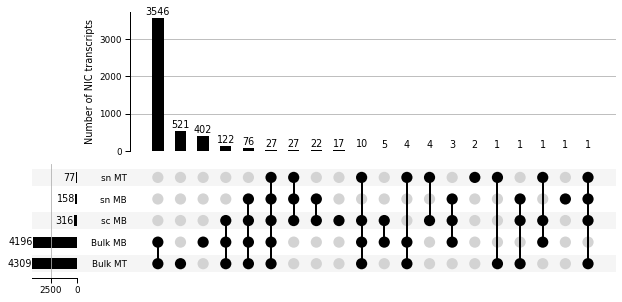

In [4]:
_, _ = plot_upset_plot(bulk, sc, opref, gtf, kind='transcript', novelty='NIC')

In [7]:
calc_detection_stats(bulk, sc, ['NIC'])

Sensitivity
0.053177966101694917
False positive rate
0.22530864197530864


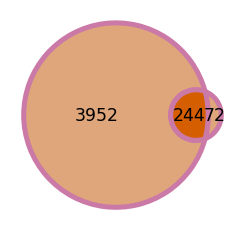

In [4]:
plot_detection_venn(bulk, sc, opref, transcript_nov='NIC', \
                    sample='MB', cell_part='cell')


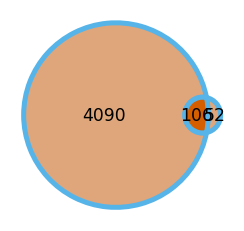

In [5]:
plot_detection_venn(bulk, sc, opref, transcript_nov='NIC', \
                    sample='MB', cell_part='nucleus')

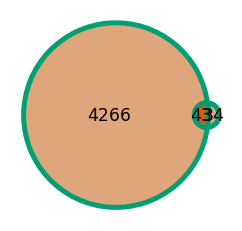

In [6]:
plot_detection_venn(bulk, sc, opref, transcript_nov='NIC', \
                    sample='MT', cell_part='nucleus')

### Panel S1I

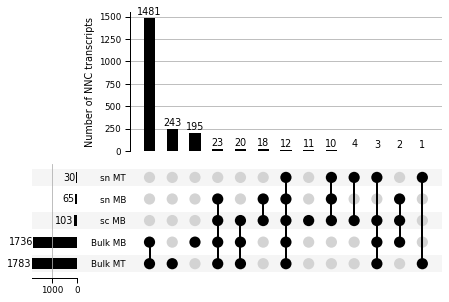

In [7]:
_, _ = plot_upset_plot(bulk, sc, opref, gtf, kind='transcript', novelty='NNC')

In [8]:
calc_detection_stats(bulk, sc, ['NNC'])

Sensitivity
0.03080808080808081
False positive rate
0.41346153846153844


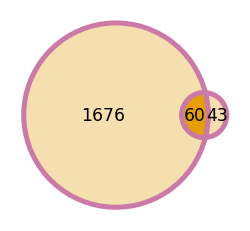

In [8]:
plot_detection_venn(bulk, sc, opref, transcript_nov='NNC', \
                    sample='MB', cell_part='cell')

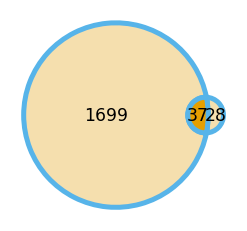

In [9]:
plot_detection_venn(bulk, sc, opref, transcript_nov='NNC', \
                    sample='MB', cell_part='nucleus')

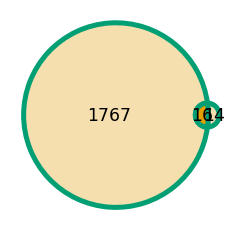

In [10]:
plot_detection_venn(bulk, sc, opref, transcript_nov='NNC', \
                    sample='MT', cell_part='nucleus')

### Extra stats

In [9]:
# sensitivity and fpr for NIC + NNC
calc_detection_stats(bulk, sc, ['NIC', 'NNC'])

Sensitivity
0.046567164179104475
False positive rate
0.27102803738317754


In [10]:
# sensitivity and fpr for NIC + NNC + Known
calc_detection_stats(bulk, sc, ['Known', 'NIC', 'NNC'])

Sensitivity
0.43235923408173765
False positive rate
0.29225039900691613
